In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np
import json
import itertools
from scipy.interpolate import griddata

In [289]:
core = [0,1]
a = []
num_dims = 2
for i in range(num_dims):
    a.append(core)
list(itertools.product(*a))

[[0, 1], [0, 1]]


[(0, 0), (0, 1), (1, 0), (1, 1)]

In [31]:
k = 5
k = complex(0,k)
print(k)
grid_x, grid_y = np.mgrid[0:1000:k, 0:1000:k]
random_points = np.vstack((grid_x.ravel(),grid_y.ravel())).T

5j


In [32]:
# STAGE 1: Pick the random coordinates to which we are going to give random fitness
dimensions = 2
dimension_size = 1000
non_corner_rand_point = 10

In [ ]:
random_points = np.random.random_integers(0, high=dimension_size, size=(non_corner_rand_point, dimensions))
corners = [(0,0), (0, 1000), (1000, 0), (1000, 1000)]
random_points = np.concatenate((random_points, corners), axis=0)
if np.unique(random_points, axis=0).shape != random_points.shape:
    print('clashing case in random point, two same coords chosen')
    print(random_points)

In [33]:
#STEP 2: Attach random fitness' to the selected coords
#Key question on what distribution the fitness should come from and descrete vs continous
#For now we process with UNIFORM[1, 100] integers
num_rand_points = random_points.shape[0]
rand_fitness_array = np.random.random_integers(1, 100, num_rand_points)

/home/huawei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  """


In [34]:
grid_x, grid_y = np.mgrid[0:1000, 0:1000]

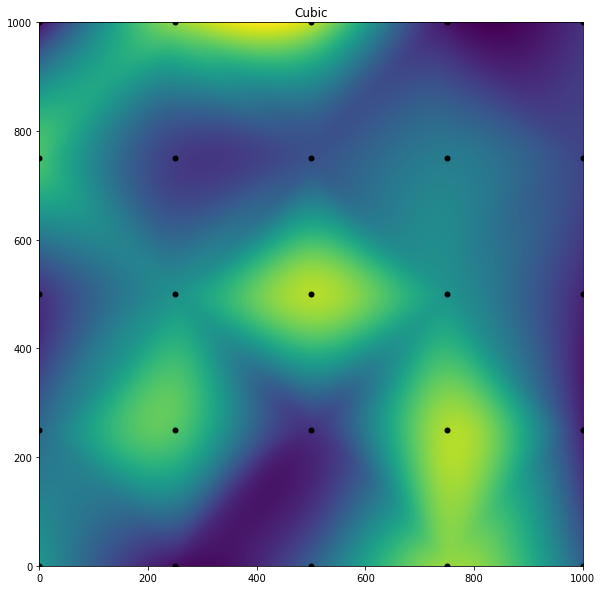

In [35]:
#Step 3: interpolate using splines from scipy
grid_fitness = griddata(random_points, rand_fitness_array, (grid_x, grid_y), method='cubic')

#Step 4: Plot the 2d world
plt.plot(random_points[:,0], random_points[:,1], 'k.', ms=10)
plt.imshow(grid_fitness.T, extent=(0,dimension_size,0,dimension_size), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(10, 10)
plt.show()

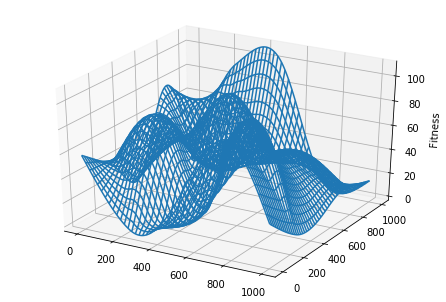

In [36]:
#plot 2d landscap e with fitness in 3 - kinda better for visualisation
from numpy import *
import pylab as p
#import matplotlib.axes3d as p3
import mpl_toolkits.mplot3d.axes3d as p3
fig=p.figure()
ax = p3.Axes3D(fig)
ax.plot_wireframe(grid_x,grid_y,grid_fitness)
ax.set_zlabel('Fitness')
p.show()
